<div style="text-align: center; font-family:Arial; font-size:1.9em; font-weight:bold"> Digital Factory Interview Challenge </div>

<br>

<div style="text-align: center; font-family:Arial; font-size:1.5em; font-weight:bold"> —— Predicting Personal Loan Conversion for Thera Bank </div>

<center><span style="font-family: Arial;font-size:1.2em"> Silvia Shixian Yang</center>
<center><span style="font-family: Arial;font-size:1.2em"> Due: 2021-9-19</center>

#  Table of Contents <a class="anchor" id="tof"></a>

<br>

* **[Executive Summary](#0)**
    
    
* **[1. Import and Initial Data Inspection](#1)**
    * [1.1. Data and Library Import](#1.1)
    * [1.2. Shape](#1.2)
    * [1.3. Datatypes](#1.3)
    * [1.4. Unique Value Check](#1.4)
    * [1.5. Null Value Check](#1.5)
    * [1.6. Statistical Summary](#1.6)
        * [1.6.1. Numeric Data](#1.6.1)
        * [1.6.2. Categorical Data](#1.6.2)


* **[2. Exploratory Data Analysis (EDA)](#2)**
    * [2.1. Univariate Analysis - Distribution of Numeric Data](#2.1)
        * [2.1.1. "Age" Attribute](#2.1.1)
        * [2.1.2. "Experience" Attribute](#2.1.2)
        * [2.1.3. "Income" Attribute](#2.1.3)
        * [2.1.4. "CCAvg" Attribute](#2.1.4)
        * [2.1.5. "Mortgage" Attribute](#2.1.5)
    * [2.2. Univariate Analysis - Distribution of Categorical Data](#2.2)
    * [2.3. Bivariate Analysis - Numeric Data](#2.3)
        * [2.3.1. Pair-wise Scatter Plot](#2.3.1)
        * [2.3.2. Correlation Matrix](#2.3.2)
        * [2.3.3. Pair-wise Student t-test](#2.3.3)
    * [2.4. Bivariate Analysis - Categorical Data](#2.4)
  
  
* **[3. Model Preperation](#3)**
    * [3.1. Metrics and Confusion Matrix](#3.1)
    * [3.2. Coefficients of Explanatory Variables](#3.2)
    * [3.3. Wrong Predictions by the Model](#3.3)



* **[4. Conclusion](#4)**

# Executive Summary <a class="anchor" id="0"></a>

The target of this study is to explore ways to help Thera bank increase their conversion rate in the persaonal loan purchase. Given some customer information, we need to find the factors that are strongly influencing customers' decision in personal loan purchase. We will first perform initial inspection to avoid abnormal data and get a sense of what we are offering. Then, we will analyze the data in univariate and bivariate perspectives, and finally use Logistic Regression to interpret the data.

**[1. Import and Initial Data Inspection](#1)**

In this section, data and libraries are imported, and an initial inspection is performed to check the integrity of the dataset. The original .csv file is read as a pandas dataframe, which has 5000 observations and 14 attributes. Firstly, the datatypes of the attributes are checked and adjusted accordingly based on their variable types (categorical or numeric) and variable uniqueness. Then, abnormal values are handled based on the inspection of the statistical summary.

The following table summarizes the information of the attributes after the analysis of this section, which can also be found in the end of this section.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Description</th>
      <th>Variable Type</th>
      <th>Data Type</th>
      <th># of unique values</th>
      <th># of null values</th>
    </tr>
    <tr>
      <th>Attribute Name</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>ID</th>
      <td>Customer ID</td>
      <td>numeric</td>
      <td>int64</td>
      <td>5000</td>
      <td>0</td>
    </tr>
    <tr>
      <th>Age</th>
      <td>Customer's age in completed years</td>
      <td>numeric</td>
      <td>int64</td>
      <td>45</td>
      <td>0</td>
    </tr>
    <tr>
      <th>Experience</th>
      <td>#years of professional experience</td>
      <td>numeric</td>
      <td>int64</td>
      <td>47</td>
      <td>0</td>
    </tr>
    <tr>
      <th>Income</th>
      <td>Annual income of the customer ($000)</td>
      <td>numeric</td>
      <td>int64</td>
      <td>162</td>
      <td>0</td>
    </tr>
    <tr>
      <th>ZIP Code</th>
      <td>Home Address ZIP</td>
      <td>categorical</td>
      <td>object</td>
      <td>467</td>
      <td>0</td>
    </tr>
    <tr>
      <th>Family</th>
      <td>Family size of the customer</td>
      <td>numeric</td>
      <td>int64</td>
      <td>4</td>
      <td>0</td>
    </tr>
    <tr>
      <th>CCAvg</th>
      <td>Avg. spending on credit cards per month (\\$000)</td>
      <td>numeric</td>
      <td>float64</td>
      <td>108</td>
      <td>0</td>
    </tr>
    <tr>
      <th>Education</th>
      <td>Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional</td>
      <td>categorical</td>
      <td>object</td>
      <td>3</td>
      <td>0</td>
    </tr>
    <tr>
      <th>Mortgage</th>
      <td>Value of house mortgage if any. (\\$000)</td>
      <td>numeric</td>
      <td>int64</td>
      <td>347</td>
      <td>0</td>
    </tr>
    <tr>
      <th>Personal Loan</th>
      <td>Did this customer accept the personal loan offered in the last campaign?</td>
      <td>categorical</td>
      <td>object</td>
      <td>2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>Securities Account</th>
      <td>Does the customer have a securities account with the bank?</td>
      <td>categorical</td>
      <td>object</td>
      <td>2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>CD Account</th>
      <td>Does the customer have a certificate of deposit (CD) account with the bank?</td>
      <td>categorical</td>
      <td>object</td>
      <td>2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>Online</th>
      <td>Does the customer use internet banking facilities?</td>
      <td>categorical</td>
      <td>object</td>
      <td>2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>CreditCard</th>
      <td>Does the customer use a credit card issued by the bank?</td>
      <td>categorical</td>
      <td>object</td>
      <td>2</td>
      <td>0</td>
    </tr>
  </tbody>
</table>


**[2. Exploratory Data Analysis (EDA)](#2)**

In this section the data distribution of the attributes is studied. Interesting findings regarding the data are:

- Univariate Analysis Findings:
    - Customers have a average age at 45, and work experience as 20 years.
    - 69.24% of the customers have zero house mortgage.
    - 90.4% of the customers in this sample did not accept the personal loan offered in the last campaign.
    - 89.56% of the customers do not have a securities account with the bank.
    - 93.96% do not have a certificate of deposit account with the bank.
    - 70.6% of the customers does not have a credit card issued by the bank.
    - Customers from Los Angeles, San Diego, San Francisco and Berkely consists of 22.84% of the sample.
- Bivariate Analysis Findings:
    - People with high income and credit card spending tend to purchases the personal loan in the last campaign. 
    - Higher family size group seems to have more customers who purchased the personal loan.
    - Higher the education level, higher the number of personal loan buyer.
    - People who do not have a certificate of deposit account would not buy the personal loan, and this group of people consist of 84.16% of the whole sample.
    
Then data for Logistic Regression is prepared by dropping unnecessary and highly-correlated attributes, and categorical variables with more than 2 values are transformed to dummy variables for the model.

So, our model has the target variable as ***Personal Loan*** and 11 explanatory variables:
- Age
- Income
- Family
- CCAvg
- Mortgage
- Securities Account
- CD Account
- Online
- CreditCard
- Education (Dummy Variables)
- City (Dummy Variables)

**[3. Prediction with Logistic Regression](#3)**

In this section, model is trained and predicted on the test group. The result is performing well. The model correctly predict 95% of the test group with an F1-score as 75%. The reason for the low F1-socre is due to the low Recall as 68% for the people who purchased the loan. In another word, our model only predicted 68% of the loan buyer right. Whatsoever, this value is still strong.

The coefficients of the explanatory variables indicate roughtly the same thing as from our bivariate analysis.
Lower age, higher income, higher family size, and higher CCAvg customers tend to have higher probability of purchasing the personal loan. Mortgage has very little influence in the prediction. In comparison, categorical values (except City) have more influence in the result that except CD Account, all others have negative coefficients. For customers who have CD account have a high probabiliy in purchasing the personal loan. It is the opposite for all other categorical variables.

**[4. Conclusion](#4)**

Possible suggestion for the bank is that for the future campaign, Thera bank could focus more on customers who have high annual income and monthly credit card spending, large family size, and are also CD Account holders. These people tend to have high probability in purchasing the loan based on the given data. The bank can promote some by-side benefit target on this group of people in order to increase the conversion rate for these people.

# 1. Import and Initial Data Inspection <a class="anchor" id="1"></a>

## 1.1. Data and Library Import <a class="anchor" id="1.1"></a>

Libraries used in this notebook are as following. If the module not found, please uncomment and run the corresponding pip install command in the next cell.

In [1]:
#!pip install plotly
#!pip install seaborn
#!pip install pyzipcode

In [2]:
import pandas as pd
import numpy as np

# Data Visualization Libraries and Methods
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

# Zip Code database
from pyzipcode import ZipCodeDatabase

# Data Analysis Tools
from scipy import stats

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, roc_curve

In [3]:
allData = pd.read_csv('Dataset.csv')

In [4]:
display(allData.head())

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## 1.2. Shape 

The shape of the dataset is 5000 by 14 - 5000 observations and 14 attributes. 

In [5]:
print('Shape of the Dataset:', allData.shape)

Shape of the Dataset: (5000, 14)


## 1.3. Datatypes <a class="anchor" id="1.3"></a>

The attribute information given in the statement informs the underlying variable types of the attributes. We have 14 attributes in total, consists of 7 numeric and 7 categorical attributes. Below is a table of the summarized attribute information.

In [6]:
# Attribute Informaion given in the Problem Statement
dataInfo = pd.DataFrame({'Description': ["Customer ID","Customer's age in completed years","#years of professional experience","Annual income of the customer ($000)", "Home Address ZIP", "Family size of the customer", "Avg. spending on credit cards per month ($000)", "Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional", "Value of house mortgage if any. ($000)", "Did this customer accept the personal loan offered in the last campaign?", "Does the customer have a securities account with the bank?", "Does the customer have a certificate of deposit (CD) account with the bank?", "Does the customer use internet banking facilities?", "Does the customer use a credit card issued by the bank?"],
                          'Variable Type': ['numeric']*4 + ['categorical', 'numeric'] + ['numeric', 'categorical', 'numeric'] + ['categorical']*5
                         }, index=allData.columns.copy())
dataInfo.index.name='Attribute Name'
display(dataInfo)

Description  \
Attribute Name                                                          
ID                                                        Customer ID   
Age                                 Customer's age in completed years   
Experience                          #years of professional experience   
Income                           Annual income of the customer ($000)   
ZIP Code                                             Home Address ZIP   
Family                                    Family size of the customer   
CCAvg                  Avg. spending on credit cards per month ($000)   
Education           Education Level. 1: Undergrad; 2: Graduate; 3:...   
Mortgage                       Value of house mortgage if any. ($000)   
Personal Loan       Did this customer accept the personal loan off...   
Securities Account  Does the customer have a securities account wi...   
CD Account          Does the customer have a certificate of deposi...   
Online              Does the customer use internet banking facilit...   
CreditCard          Does the customer use a credit card issued by ...   

                   Variable Type  
Attribute Name                    
ID                       numeric  
Age                      numeric  
Experience               numeric  
Income                   numeric  
ZIP Code             categorical  
Family                   numeric  
CCAvg                    numeric  
Education            categorical  
Mortgage                 numeric  
Personal Loan        categorical  
Securities Account   categorical  
CD Account           categorical  
Online               categorical  
CreditCard           categorical

According to the initial check, pandas reads most attributes as 64-bit integers, except ***CCAvg*** as 64-bit float. However, we have several categorical attributes who are represented by numbers. So, the data types of the categorical attributes need to be changed to "object" type for further analysis.

In [7]:
# Initial Check of data types
allData.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
# Change the data types of categorical data to object type
categorical_attributes = dataInfo[dataInfo['Variable Type'] == 'categorical'].index
allData[categorical_attributes] = allData[categorical_attributes].astype('object')

# Update data information table
dataInfo['Data Type'] = allData.dtypes

display(dataInfo)

Description  \
Attribute Name                                                          
ID                                                        Customer ID   
Age                                 Customer's age in completed years   
Experience                          #years of professional experience   
Income                           Annual income of the customer ($000)   
ZIP Code                                             Home Address ZIP   
Family                                    Family size of the customer   
CCAvg                  Avg. spending on credit cards per month ($000)   
Education           Education Level. 1: Undergrad; 2: Graduate; 3:...   
Mortgage                       Value of house mortgage if any. ($000)   
Personal Loan       Did this customer accept the personal loan off...   
Securities Account  Does the customer have a securities account wi...   
CD Account          Does the customer have a certificate of deposi...   
Online              Does the customer use internet banking facilit...   
CreditCard          Does the customer use a credit card issued by ...   

                   Variable Type Data Type  
Attribute Name                              
ID                       numeric     int64  
Age                      numeric     int64  
Experience               numeric     int64  
Income                   numeric     int64  
ZIP Code             categorical    object  
Family                   numeric     int64  
CCAvg                    numeric   float64  
Education            categorical    object  
Mortgage                 numeric     int64  
Personal Loan        categorical    object  
Securities Account   categorical    object  
CD Account           categorical    object  
Online               categorical    object  
CreditCard           categorical    object

Now, we have the data types matching the variable types.

## 1.4. Unique Value Check <a class="anchor" id="1.4"></a>

Upon checking the number of unique values in each column, we care more about categorical data and the attribute ***ID***, since they are the ones we have expected number of unique values in mind. Whereas, numeric data is either continuous or discrete with a lot of values, so there is no need to analyze their unique values.

***ID*** has 5000 unique values, indicates that each customer has a unique ID, which is desirable. For the categorical data, we expect to see matched number of unique values with the description. ***Education*** should have 3 unique values, since it is a 3-choice question. ***Personal Loan, Securities Account, CD Account, Online, and CreditCard*** should all have 2 unique values, since they are true-or-false questions. These are all matched.

In [9]:
print("Number of unique in each column:")
display(allData.apply(lambda x: len(np.unique(x)), axis=0))

Number of unique in each column:


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [10]:
# add the result to dataInfo
dataInfo['# of unique values'] = allData.apply(lambda x: len(np.unique(x)), axis=0)

## 1.5. Null Value Check <a class="anchor" id="1.5"></a>

For the null values, the dataset is free from null values for all attributes as a quick check below. So, we do not need to do any null value processing.

In [11]:
print('Number of null values of each attribute:')
display(allData.isnull().sum())

Number of null values of each attribute:


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
# add result to dataInfo
dataInfo['# of null values'] = allData.isnull().sum()

## 1.6. Statistical Summary <a class="anchor" id="1.6"></a>

The descriptive statistics is checked differently for numeric and categorical attributes.

### 1.6.1. Numeric Data <a class="anchor" id="1.6.1"></a>

For each numeric attribute, count, mean, std, min, max and quantiles are summarized as below. Except ***Experience***, all other attributes seems to have reasonable statistics, which are positive and have identical counts as the number of total observations.

In [13]:
display(allData.describe(exclude='object').round(2))

ID      Age  Experience   Income   Family    CCAvg  Mortgage
count  5000.00  5000.00     5000.00  5000.00  5000.00  5000.00   5000.00
mean   2500.50    45.34       20.10    73.77     2.40     1.94     56.50
std    1443.52    11.46       11.47    46.03     1.15     1.75    101.71
min       1.00    23.00       -3.00     8.00     1.00     0.00      0.00
25%    1250.75    35.00       10.00    39.00     1.00     0.70      0.00
50%    2500.50    45.00       20.00    64.00     2.00     1.50      0.00
75%    3750.25    55.00       30.00    98.00     3.00     2.50    101.00
max    5000.00    67.00       43.00   224.00     4.00    10.00    635.00

***Experience*** **Attribute Handling**

The number of years of professional experience has a minimum as low as -3, which is abnormal and seems to be an incorrect imputation. Taking a closer look, there are 52 negative values in this attribute with 33 "-1"s, 15 "-2"s and 4 "-3"s.

A person could not have negative years of work experience under common sense. Another possible explanation for such a setting might be that it aims to impute missing data to represent something else, like years to graduate if assuming that one will start to work immidiately upon graduation. Then, 1 year from expected graduation date might end up with -1 years of work experience. Whatsoever, since we do not have enough information under this case, we will **treat the negative cases as 0**, meaning these people have no work experiences.

In [14]:
print('# of negative Experience:', allData[allData.Experience < 0].Experience.count())
print('\nValue counts of different negative Experiences:')
display(allData[allData.Experience < 0].Experience.value_counts())

# of negative Experience: 52

Value counts of different negative Experiences:


-1    33
-2    15
-3     4
Name: Experience, dtype: int64



Since we do not have enough information under this case, 

In [15]:
allData.Experience = np.maximum(0, allData.Experience)
print('# of negative Experience:', allData[allData.Experience < 0].Experience.count())

# of negative Experience: 0


### 1.6.2. Categorical Data <a class="anchor" id="1.6.1"></a>

The descriptive statistics for the categorical data looks fine. All of them have the same count as the observations of the dataset. The "unique" row has been analyzed in the [Section 1.4](#1.4), please refer to the analysis there. "top" row represents the category with the highest count, whose count is the "freq" row. These two statistics look fine and reasonable for all of the categorical data.

In [16]:
display(allData.describe(include='object'))

ZIP Code  Education  Personal Loan  Securities Account  CD Account  \
count       5000       5000           5000                5000        5000   
unique       467          3              2                   2           2   
top        94720          1              0                   0           0   
freq         169       2096           4520                4478        4698   

        Online  CreditCard  
count     5000        5000  
unique       2           2  
top          1           0  
freq      2984        3530

## Summary of Data Inspection

In [17]:
display(dataInfo)

Description  \
Attribute Name                                                          
ID                                                        Customer ID   
Age                                 Customer's age in completed years   
Experience                          #years of professional experience   
Income                           Annual income of the customer ($000)   
ZIP Code                                             Home Address ZIP   
Family                                    Family size of the customer   
CCAvg                  Avg. spending on credit cards per month ($000)   
Education           Education Level. 1: Undergrad; 2: Graduate; 3:...   
Mortgage                       Value of house mortgage if any. ($000)   
Personal Loan       Did this customer accept the personal loan off...   
Securities Account  Does the customer have a securities account wi...   
CD Account          Does the customer have a certificate of deposi...   
Online              Does the customer use internet banking facilit...   
CreditCard          Does the customer use a credit card issued by ...   

                   Variable Type Data Type  # of unique values  \
Attribute Name                                                   
ID                       numeric     int64                5000   
Age                      numeric     int64                  45   
Experience               numeric     int64                  47   
Income                   numeric     int64                 162   
ZIP Code             categorical    object                 467   
Family                   numeric     int64                   4   
CCAvg                    numeric   float64                 108   
Education            categorical    object                   3   
Mortgage                 numeric     int64                 347   
Personal Loan        categorical    object                   2   
Securities Account   categorical    object                   2   
CD Account           categorical    object                   2   
Online               categorical    object                   2   
CreditCard           categorical    object                   2   

                    # of null values  
Attribute Name                        
ID                                 0  
Age                                0  
Experience                         0  
Income                             0  
ZIP Code                           0  
Family                             0  
CCAvg                              0  
Education                          0  
Mortgage                           0  
Personal Loan                      0  
Securities Account                 0  
CD Account                         0  
Online                             0  
CreditCard                         0

# 2. Exploratory Data Analysis (EDA) <a class="anchor" id="2"></a>

Our goal is to explore a way of converting more liability customers to personal loan customers, i.e. to predict whether a customer will buy the personal loan. Thus, **the target variable of our interest is "Personal Loan."** In this section, the data distribution of the attributes will be studied, and interesting attributes will be closely examined. Bivariate analysis will be performed to find potential predictors and prepare for our prediction model. 

Under the statement, we will use Logistic Regression as our prediction model. Therefore, we will drop some attributes to satisfy the assumptions of Logistic Regression and help the model to give better prediction. The assumptions of Logistic Regression are:

1. Binary target variable,
2. Independent observations,
3. **No multicolinearity among explanatory variables,**
4. **No extreme outliers,**
5. **Linear relationship between explanatory variable and taget variable,**
6. Sample size is large.
 
The ones we need to pay special attentions are number 3, 4 and 5, in which 3 will be checked in bivariate analysis, and 4 will be check in univariate analysis.

## 2.1. Univariate Analysis - Distribution of Numeric Data <a class="anchor" id="2.1"></a>

We can take a rough glance of all of the histograms of 6 numeric attributes as the following. 

**ID** is just a sequence of natural numbers from 1 to 5000, so it has a uniform distribution as expected, and nothing more. Whereas, other 5 attributes have more interesting distribution and worth a close-look examination. ***Family*** attribute has only 4 values. It can be observed that most cutomers only have 1 family member, but there is no big differences among the number of people in each family size. Each varies by roughly 200 people.

All other variables are showing pretty interesting distribution. So, we will take a close look at the distribution of **Age**, **Experience**, **Income**, **CCAvg** and **Mortgage** in the following subsections.

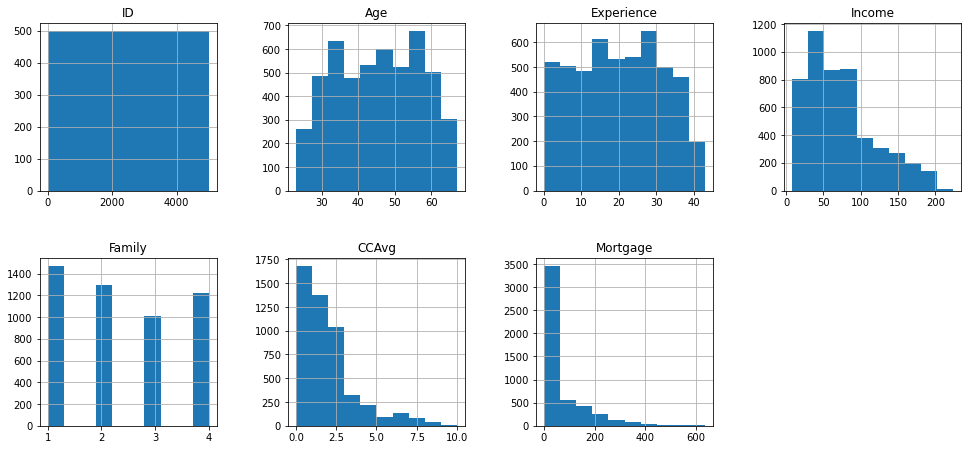

In [18]:
# Histograms
allData.hist(figsize=(16,7), bins=10, layout=(2,4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [19]:
def do_plots(df, top_count):
    '''
    Histogram and Boxplot plot helper for attributes
    
    Input: data column, highest bin
    Output: None
    '''
    fig = make_subplots(rows=2, cols=1,
                        shared_xaxes=True,
                       row_heights=[4,1],
                       x_title=df.name,
                       row_titles=['count', ''])

    fig.add_trace(
        go.Histogram(x=df),
        row=1, col=1
    )

    fig.add_trace(
        go.Box(x=df),
        row=2, col=1
    )
    
    fig.add_shape(
        go.layout.Shape(type='line', xref='x', yref='paper',
                        x0=df.mean(), y0=0, x1=df.mean(), y1=top_count, line={'dash': 'dash'}),
                        row=1, col=1
    )
    
    fig.add_annotation(
        x=df.mean(), y=top_count,
        text="Mean: %.2f" % df.mean(),
        showarrow=True,
        arrowhead=1
    )

    fig.update_layout(height=500)
    fig.show()

### 2.1.1. Age <a class="anchor" id="2.1.1"></a>

The histogram on the top shows the count of customers in each age from minimum 23 to maximum 67. Values are continuous with no gap. 

It can be observed that the age has a roughly symmetric distribution with most of the customers clustered between 30 and 60 years old and short tail on both sides. Such symmetry can also be observed from the boxplot that there is no obvious skewness in the distribution.

This indicates that the customer group of Thera Bank is mainly the middle-age people who are from 30 to 60 with a mean of 45 years old.

In [20]:
do_plots(allData['Age'], 160)

### 2.1.2. Experience <a class="anchor" id="2.1.2"></a>

The histogram shows the count of customers in each number of years of professional experiences from minimum 0 to maximum 43. Values are continuous with no gap.

The distribution is roughly even for numbers less than around 35, and then shows a gradual decline as number gets bigger. This is also reflected in the boxplot that the distribution is slightly skewed-right.

This makes sense, because as working years pass 40, people starts to retire. So, there are fewer and fewer customers who have more than 35 years of work experience.

In [21]:
do_plots(allData['Experience'], 160)

### 2.1.3. Income <a class="anchor" id="2.1.3"></a>

The annual income of the cutomers shows a right-skewed distribution that most of the customers have an annual income from \\$39,000 to \\$100,000.

In [22]:
do_plots(allData['Income'], 400)

### 2.1.4 CCAvg <a class="anchor" id="2.1.4"></a>

The average spending on credit cards per month shows a heavily right-skewed distribution. Majority of the customers have average spending below \\$2.000, and 2.12\% of the customers have zero credit card spending per month. Due to heavy cluster of customers on the left side, the upper fence is identified as \\$5,200 which results in a lot of outliers.

In [23]:
print('Number (Percentage) of people with zero credit card spending per month: %d (%.2f%%)'
      %((allData['CCAvg'] == 0).sum(), 
        (allData['CCAvg'] == 0).sum()/allData.shape[0]*100))

Number (Percentage) of people with zero credit card spending per month: 106 (2.12%)


In [24]:
do_plots(allData['CCAvg'], 450)

### 2.1.5. Mortgage <a class="anchor" id="2.1.5"></a>

There are 3462 customers, which consists of 69.24% of the 5000 customers, have no house mortgage. Thus, the histogram and boxplot does not make sense due to such a huge number of zeros.

If we only select the customers have positive value in house mortgage, we can observe that the distribution is heavily right-skewed. Most customers have relatively low house mortgage, and as the value increases, the number of people rapidly drops.

The distribution containing zero mortgage is rich with outliers, that is not very advantageous for our model. We will further check the predictability of this attribute towards the purchase action of personal loan in the [Section 2.3](#2.3) to see if we need to drop this attribute for our model.

In [25]:
print('Number (Percentage) of people with zero mortgage: %d (%.2f%%)'
      %((allData['Mortgage'] == 0).sum(), 
        (allData['Mortgage'] == 0).sum()/allData.shape[0]*100))

Number (Percentage) of people with zero mortgage: 3462 (69.24%)


In [26]:
print("With 0 Mortgage")
do_plots(allData['Mortgage'], 3000)

With 0 Mortgage


In [27]:
print("Without 0 Mortgage")
do_plots(allData[allData.Mortgage > 0]['Mortgage'], 250)

Without 0 Mortgage


## 2.2. Univariate Analysis - Distribution of Categorical Data <a class="anchor" id="2.2"></a>

We can examine the 8 categorical attributes through the bar plots of their value counts.

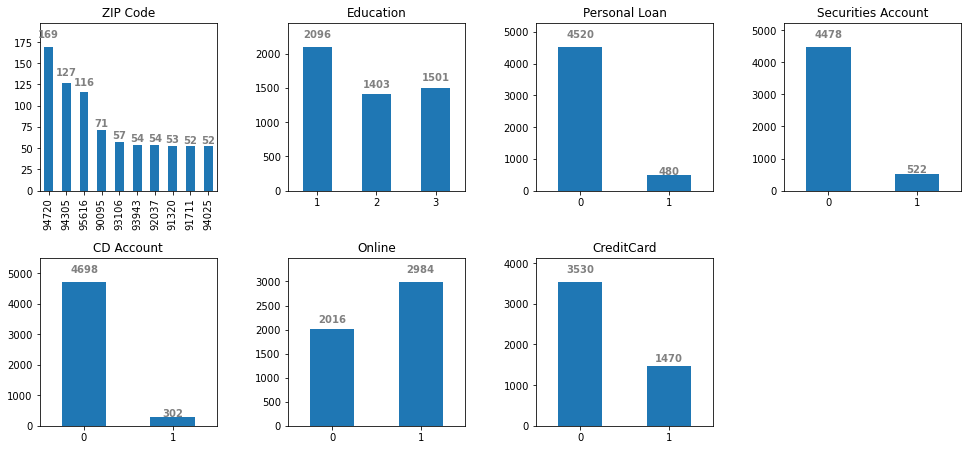

In [28]:
# Get the list of names of the categorical data
c_attributes = dataInfo[dataInfo['Variable Type'] == 'categorical'].index.tolist()

def addlabels(x,y):
    '''Add Labels to Bar Plot Helper'''
    for i in range(len(x)):
        plt.text(i, y[i]*1.07, y[i], ha='center', fontweight='semibold', color='grey')

# Plot the bar plots
a, b, c = 2, 4, 1  # nrow, ncol, counter
fig = plt.figure(figsize=(16,7))

# plot the top 10 zip codes seperately
name = c_attributes[0]
df = allData[name].value_counts()[:10].copy() # get top 10 value count zip codes
df.index = df.index.map(str) # map zip codes to string for bar plot

# do subplot
plt.subplot(a, b, c)
plt.title(name)
df.plot(kind='bar')
plt.ylim(0, df.max()*1.17)
addlabels(df.index.tolist(), df.values)
c+=1

for i in range(len(c_attributes[1:])):
    
    name = c_attributes[i+1]
    df = allData[name].value_counts().sort_index()
    
    # do subplot
    plt.subplot(a, b, c)
    plt.title(name)
    df.plot(kind='bar', rot=0)
    plt.ylim(0, df.max()*1.17)
    addlabels(df.index.tolist(), df.values)
    c+=1

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

- ***ZIP Code*** attribute has 467 unique values as found in [Section 1.4](#1.4), matplotlib cannot plot this much of values on the x-axis. So, the top10 value count zip codes are selected and plotted along side with other attributes. It is interesting to see that top 10 zip codes are all in California, which has zip code range as 90001 to 96162.
- ***Education***: Almost half of the customers (41.92%) in this sample earned bachelor's degree, and higher-degree customers consist of the other half.
- ***Personal Loan***:  This is our **target variable**. 90.4% of the customers in this sample did not accept the personal loan offered in the last campaign, which makes the target variable very unbalanced.
- ***Securities Account***: Majority of the customers (89.56%) in this sample do not have a securities account with the bank.
- ***CD Account***: It can be observed that majority of the customers (93.96%) do not have a certificate of deposit account with the bank.
- ***Online***: More than a half, 59.68%, of the customers use internet bankikng facilities.
- ***CreditCard***: 70.6% of the customers does not have a credit card issued by the bank.

### Zip Code
Region might have a power in representing people's wealth level, and might end up influencing people's decision of purchasing the personal loan. Since there are 467 zip codes, we will wind it down and make it easy for us to performa analysis.

In [29]:
db = ZipCodeDatabase() # initiate zip code database
def zip_to_city(zipcode):
    '''convert zip code to city name'''
    try:
        return db[zipcode].city
    except KeyError:
        return 'Not Found'
    
def zip_to_state(zipcode):
    '''convert zip code to state name'''
    try:
        return db[zipcode].state
    except KeyError:
        return 'Not Found'

In [30]:
regionData = allData.copy()
regionData['City'] = allData['ZIP Code'].map(zip_to_city)
regionData['State'] = allData['ZIP Code'].map(zip_to_state)

There are 34 zip codes not found in the database, which are as following. Since the number is small, we will name them as "Not Found", and assume that these people live in a city named "Not Found".

In [31]:
print('# of zip codes not found: %d'%sum(regionData.City == 'Not Found'))
display(regionData['ZIP Code'][regionData.City == 'Not Found'].value_counts())

# of zip codes not found: 34


92717    22
96651     6
92634     5
9307      1
Name: ZIP Code, dtype: int64

There is only one state for the database, which is California. There are 2, because we set the zip code that are not found as "Not Found" string. Thus, we will use the ***City*** attribute, and numbering the cities from 1 to 243 in an order of counts.

In [32]:
display(regionData[['City', 'State']].apply(lambda x: len(x.value_counts()), axis=0))

City     243
State      2
dtype: int64

In [33]:
ordered_cities = regionData.City.value_counts().index.tolist()
city_to_id = {ordered_cities[i]: i+1 for i in range(len(ordered_cities))} # dictionary for numbering the cities
regionData['City ID'] = regionData.City.map(city_to_id) # add the city id to the dataframe

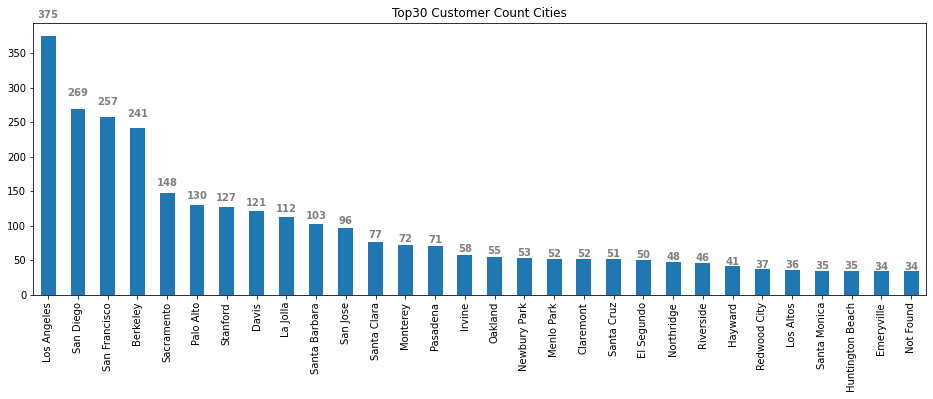

In [34]:
df = regionData['City'].value_counts()[:30].copy() # get top 30 value count cities
df.plot(kind='bar', figsize=(16,5), title="Top30 Customer Count Cities") # plot
addlabels(df.index.tolist(), df.values) # add labels
plt.show()

Los Angeles has the most number of customers from this sample, which is 7.5% of the sample. San Diego, San Francisco and Berkely have relatively the same number of customers in this sample, each is roughly 5% of the sample. 

In [35]:
# Add City ID to allData
allData['City'] = regionData['City']

## 2.3. Bivariate Analysis - Numeric Data <a class="anchor" id="2.3"></a>

In this section, we will analyze numeric data through pair-wise scatter plot with ***Personal Loan*** labeled in different color, correlation matrix and pair-wise t-test. Through this analysis, we will identify the potential predictors and prepare for our model's explanatory variables.

### 2.3.1. Pair-wise Scatter Plot <a class="anchor" id="2.3.1"></a>
A pairplot is drawn as below for numeric data except ***ID***. Kernal density estimate is plotted along the diagonal. Customers who have purchased the personal loan is marked as orange, otherwise as blue.

In [36]:
n_attributes = dataInfo[dataInfo['Variable Type'] == 'numeric'].index.tolist()

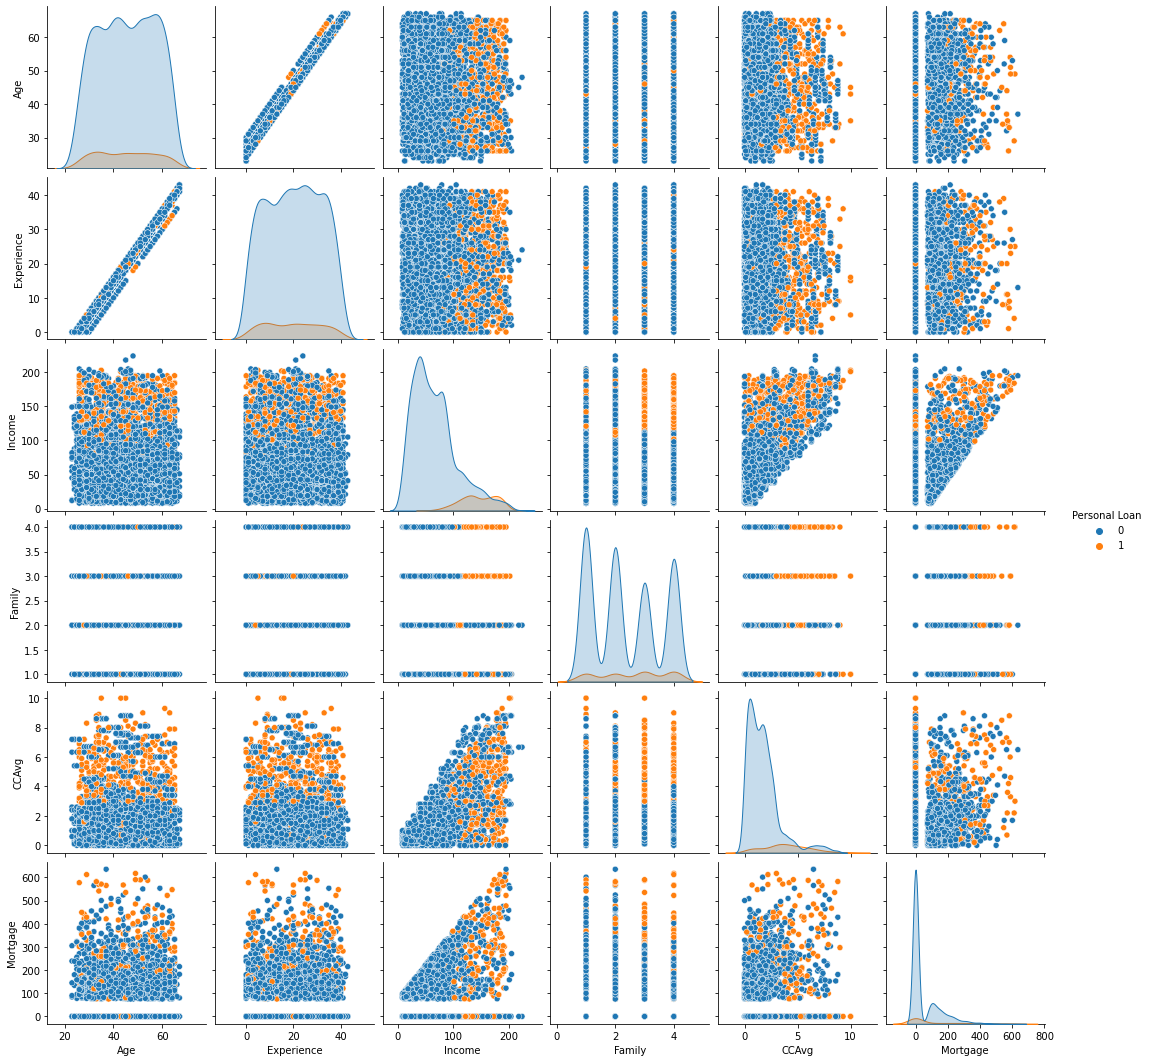

In [37]:
sns.pairplot(allData[n_attributes[1:]+['Personal Loan']], hue = 'Personal Loan', diag_kind = 'kde')
plt.show()

- **Pair-wise Scatter Plot Findings:**

It is interesting to observe that ***Age*** & ***Experience*** pair is showing a clear positive linear relationship, and both ***Income*** & ***CCAvg*** and ***Income*** & ***Mortgage*** forms a triangular shape. These are consistent with our common sense that age is proportional to years of professional experience; people who have high income tends to have more credit card spending and more house mortgage due to their affordability, whereas it is impossible for one who has low income and spend a lot of money using credit card and even buy a house with house mortgage.

- **Distribution of Personal Loan Purchase Findings:**

As of the distribution of personal loan purchase, ***Income***, ***CCAvg*** and ***Family*** seem to be related to the decision of personal loan purchase in the last campaign. People with high income and credit card spending tend to purchases the personal loan in the last campaign. Higher family size group seems to have more customers who purchased the personal loan.

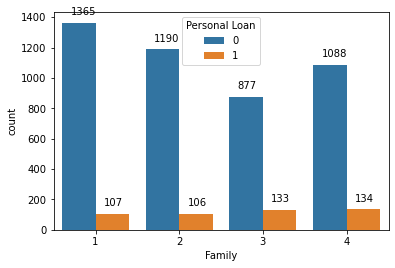

In [38]:
table = pd.crosstab(allData['Personal Loan'], allData['Family'],)

# Plot the countplot
ax = sns.countplot(x='Family', hue='Personal Loan', data=allData)
for p in ax.patches:
        ax.annotate('%.0f'%(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

### 2.3.2. Correlation Matrix <a class="anchor" id="2.3.2"></a>

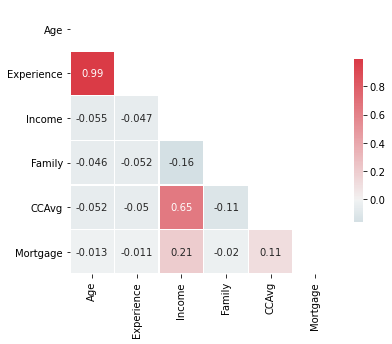

In [39]:
def draw_corr(corr):
    '''Draw correlation matrix using seaborn'''
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    f, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
    
draw_corr(allData.iloc[:, 1:].corr())

From the correlation matrix above, ***Experience***&***Age*** pair does have very strong correlation (0.99). Recall that ***Experience*** has negative values in the orginal dataset, so between these two attributes, we will drop ***Experience*** attribute for our model. ***CCAvg***&***Income*** pair also has a relatively high correlation (0.65), but their scatter plot does not show a strong colinearity, so we will keep them.

### 2.3.3. Pair-wise Student t-test <a class="anchor" id="2.3.3"></a>

We perform the paired sample t-test on the numeric data and check if their means in the two groups are significantly differing from each other. The null hypothesis $H_0$ for this test is $\mu (X_1) = \mu (X_2)$, where $X_1$ and $X_2$ are the two variables representing people who purchased and not purchased the personal loan in each attribute. If the p-value is smaller than 0.05, then we reject the null hypothesis, which means that the mean of $X_1$ and $X_2$ are significantly different.

In [40]:
n_df = allData[n_attributes[1:]+['Personal Loan']].copy() # get numeric data columns

result = {}
for a in n_df.columns.tolist()[:-1]:
    r1 = n_df[n_df['Personal Loan'] == 0][a] # X1
    r2 = n_df[n_df['Personal Loan'] == 1][a] # X2
    T,p = stats.ttest_ind(r1, r2) # perform paired t-test
    result[a] = [r1.mean(), r2.mean(), T, p] # store mu(X1), mu(X2), t-stats and p-value

display(pd.DataFrame(result, index=['Personal Loan = 0 Mean', 'Personal Loan = 1 Mean', 'T-statistic', 'p-value']).round(2))

Age  Experience  Income  Family  CCAvg  Mortgage
Personal Loan = 0 Mean  45.37       20.15   66.24    2.37   1.73     51.79
Personal Loan = 1 Mean  45.07       19.84  144.75    2.61   3.91    100.85
T-statistic              0.55        0.56  -41.09   -4.35 -27.88    -10.15
p-value                  0.58        0.58    0.00    0.00   0.00      0.00

By performing the paired sample t-test on the numeric data, ***Income***, ***Family***, ***CCAvg*** and ***Mortgage***  give every small p-values, which means that under the assumption that these attributes follow student-t distribution, their numbers for people who purchased and not purchased personal loan are significantly different. This indicates that they might be pretty good predictor for ***Personal Loan***.

In [41]:
df = pd.concat([allData.groupby('Personal Loan').mean().Mortgage, 
               allData.groupby('Personal Loan').apply(lambda x: sum(x.Mortgage == 0))], axis=1)
df.columns=['Mortgage Mean', '# Zero Mortgage']
display(df.round(2))

Mortgage Mean  # Zero Mortgage
Personal Loan                                
0                      51.79             3150
1                     100.85              312

Also note that as studied in [Section 2.1.5](#2.1.5), ***Mortgage*** has 3462 (69.24%) zero values. Although this is a sign of outlier, we cannot drop this attribute. As calculated above, among people who did not purchase personal loan, there are 3150 of them who have zero mortgage, which is 63% of the whole sample. Therefore, this attribute is still a good predictor for ***Personal Loan***, and cannot be dropped.

## 2.4. Bivariate Analysis - Categorical Data <a class="anchor" id="2.4"></a>

We are now interested in knowing if the categorical variable has a predictive value in ***Personal Loan***. So, we will examine the number of people who purchased the loan or not for each categorical variable, and at the same time perform the chi-square hypothesis test.

Chi-square hypothesis test aims to test whether the count of the target variable in different categories is the same. Thus, if the test yields a p-value lower than 0.05, we could say that the target variable counts of different categories are significantly different.

In [42]:
c_attributes = dataInfo[dataInfo['Variable Type'] == 'categorical'].index.tolist() # get all categorical attributes
c_attributes.remove('ZIP Code')
c_attributes.remove('Personal Loan')
c_attributes += ['City']

City:
p-value = 0.85341 
 difference significant? = False



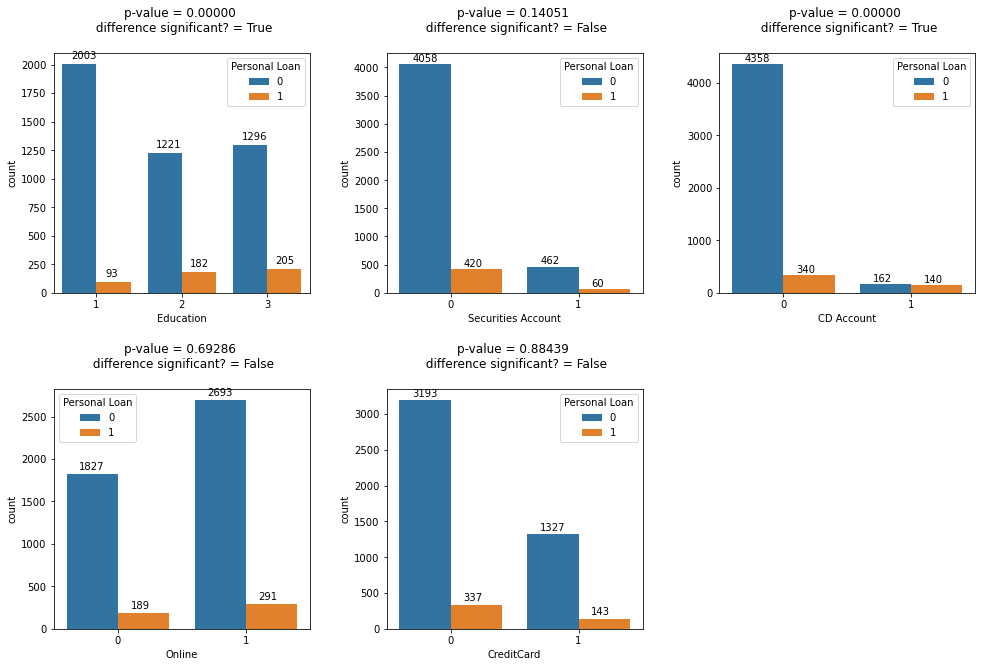

In [43]:
def sig(p):
    '''checking whether results are significant'''
    if p<0.05:
        return True
    else:
        return False
    
print('City:')
# crosstab
table = pd.crosstab(regionData['Personal Loan'], regionData['City'])
f_obs = np.array([table.iloc[0][:].values, 
                  table.iloc[1][:].values])\

#performing chi2 test
chi, p, dof, expected = stats.chi2_contingency(f_obs)
print("p-value = %.5f \n difference significant? = %s\n"%(round(p,8), sig(p)))

plt.figure(figsize=(16,10))
a,b,c = 2,3,1

for i in range(len(c_attributes[:-1])):
    
    name = c_attributes[i]
    
    # crosstab
    table = pd.crosstab(allData['Personal Loan'], allData[name],)
    f_obs = np.array([table.iloc[0][:].values, 
                      table.iloc[1][:].values])
    
    # chi2 test
    chi, p, dof, expected = stats.chi2_contingency(f_obs)
    
    # Plot the countplot
    plt.subplot(a,b,c)
    plt.title("p-value = %.5f \n difference significant? = %s\n"%(round(p,8),sig(p)))
    ax = sns.countplot(x=name, hue='Personal Loan', data=allData)
    for p in ax.patches:
        ax.annotate('%.0f'%(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    c+=1

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

# Code inspired from 
# https://www.kaggle.com/lonewolf95/eda-102-bivariate-analysis-for-beginners#Bivariate:-Categorical-Categorical

Since there are over 100 cities, we will not plot the countplot for it, instead just perform the chi-square test.

From the results above, ***Education*** and ***CD Account*** show a positive result from the test that the count in ***Personal Loan*** differs significantly accross groups.

- ***Education***: Higher the education level, higher the number of personal loan buyer.
- ***CD Account***: People who do not have a certificate of deposit account would not buy the personal loan, and this group of people consist of 84.16% of the whole sample.

## 2.5 Model Preperation

According to the analysis in the above section, the following attributes will be dropped for our model.

- ***ID***: meaningless for our model
- ***Experience***: it is higly correlated with ***Age***, and it orginally contains negative values which is ambiguous.

We will use ***City*** attribute, instead of ***ZIP Code***, which would be broader in a sense for region, and better for data interpretation.

We will create dummy variables for the categorical data that have more than 2 categories, that would be ***City*** and ***Education***.

In [44]:
# numeric variables
X_n = allData[['Age', 'Income', 'Family', 'CCAvg', 'Mortgage']].copy()
# binary categorical variables
X_c = allData[['Securities Account','CD Account','Online','CreditCard']].astype('int').copy()
# Dummy variables for categorical data with more than 2 categories
X_d = pd.get_dummies(allData[['Education', 'City']])

In [45]:
modelData = pd.concat([allData['Personal Loan'].astype('int'), X_n, X_c, X_d], axis=1)
modelData

Personal Loan  Age  Income  Family  CCAvg  Mortgage  Securities Account  \
0                 0   25      49       4    1.6         0                   1   
1                 0   45      34       3    1.5         0                   1   
2                 0   39      11       1    1.0         0                   0   
3                 0   35     100       1    2.7         0                   0   
4                 0   35      45       4    1.0         0                   0   
...             ...  ...     ...     ...    ...       ...                 ...   
4995              0   29      40       1    1.9         0                   0   
4996              0   30      15       4    0.4        85                   0   
4997              0   63      24       2    0.3         0                   0   
4998              0   65      49       3    0.5         0                   0   
4999              0   28      83       3    0.8         0                   0   

      CD Account  Online  CreditCard  ...  City_Vista  City_Walnut Creek  \
0              0       0           0  ...           0                  0   
1              0       0           0  ...           0                  0   
2              0       0           0  ...           0                  0   
3              0       0           0  ...           0                  0   
4              0       0           1  ...           0                  0   
...          ...     ...         ...  ...         ...                ...   
4995           0       1           0  ...           0                  0   
4996           0       1           0  ...           0                  0   
4997           0       0           0  ...           0                  0   
4998           0       1           0  ...           0                  0   
4999           0       1           1  ...           0                  0   

      City_Weed  City_West Covina  City_West Sacramento  \
0             0                 0                     0   
1             0                 0                     0   
2             0                 0                     0   
3             0                 0                     0   
4             0                 0                     0   
...         ...               ...                   ...   
4995          0                 0                     0   
4996          0                 0                     0   
4997          0                 0                     0   
4998          0                 0                     0   
4999          0                 0                     0   

      City_Westlake Village  City_Whittier  City_Woodland Hills  \
0                         0              0                    0   
1                         0              0                    0   
2                         0              0                    0   
3                         0              0                    0   
4                         0              0                    0   
...                     ...            ...                  ...   
4995                      0              0                    0   
4996                      0              0                    0   
4997                      0              0                    0   
4998                      0              0                    0   
4999                      0              0                    0   

      City_Yorba Linda  City_Yucaipa  
0                    0             0  
1                    0             0  
2                    0             0  
3                    0             0  
4                    0             0  
...                ...           ...  
4995                 0             0  
4996                 0             0  
4997                 0             0  
4998                 0             0  
4999                 0             0  

[5000 rows x 256 columns]

# 3. Prediction with Logistic Regression <a class="anchor" id="3"></a>

According to the analysis in the above section, the following attributes will be dropped for our model.

- Numeric:
    - ***ID***: meaningless for our model
    - ***Experience***: it is higly correlated with ***Age***, and it orginally contains negative values which is ambiguous.
- Categorical:
    - ***ZIP Code*** and ***City***: there are too many zip codes, even winding it down to city level, which is not suitable for the logistic regresssion model

In [46]:
def model_performance(X_train, y_train, X_test, y_test, y_pred):
    '''Model Performance Printing Helper'''
    
    print('Accuracy on train: %.2f' % model.score(X_train, y_train))
    print('Accuracy on test: %.2f' % model.score(X_test, y_test))
    print('Recall: %.2f' % recall_score(y_test,y_pred))
    print('Precision score: %.2f' % precision_score(y_test,y_pred))
    print('F1 score: %.2f' % f1_score(y_test,y_pred))
    print('ROC AUC score: %.2f' % roc_auc_score(y_test,y_pred))
    print('\n'+'-'*20+'CLASSIFICATION REPORT'+'-'*20+'\n')
    print(classification_report(y_test, y_pred))
    print('-'*61)

    plt.figure(figsize=(16,5))
    a,b,c = 1,2,1

    # Confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    plt.subplot(121)
    sns.heatmap(cm,annot=True, cmap=sns.cubehelix_palette(as_cmap=True), 
                fmt='.2f', xticklabels=[0,1], yticklabels=[0,1], linewidths=1.5)
    plt.title('CONFUSION MATRIX')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')

    # ROC plot
    fpr, tpr, _ = roc_curve(y_test, y_pred, drop_intermediate=True)
    plt.subplot(122)
    plt.plot(fpr, tpr, [0,1], [0, 1])
    plt.title('AUC-ROC CURVE')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.style.use('seaborn')

    plt.show()

In [47]:
X = modelData.drop('Personal Loan', axis=1)
y= modelData['Personal Loan']

In [48]:
# Split the data into training and test set in the ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

# logistic regression model
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 3.1. Metrics and Confusion Matrix  <a class="anchor" id="3.1"></a>

Accuracy on train: 0.96
Accuracy on test: 0.95
Recall: 0.68
Precision score: 0.85
F1 score: 0.75
ROC AUC score: 0.83

--------------------CLASSIFICATION REPORT--------------------

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1344
           1       0.85      0.68      0.75       156

    accuracy                           0.95      1500
   macro avg       0.91      0.83      0.86      1500
weighted avg       0.95      0.95      0.95      1500

-------------------------------------------------------------


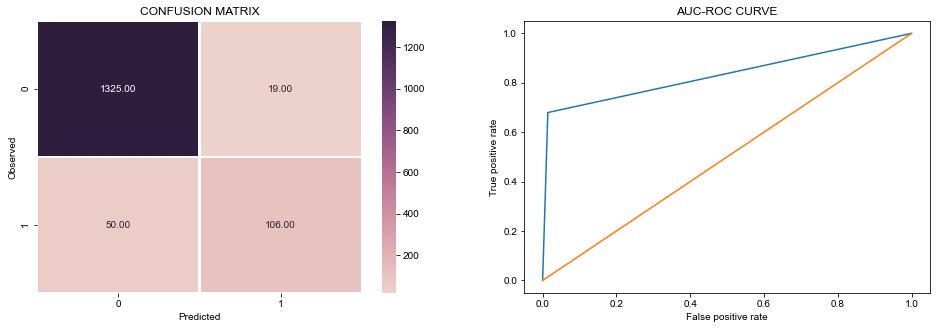

In [49]:
model_performance(X_train, y_train, X_test, y_test, y_pred)

The model has a pretty high accuracy score as 95%, and F1 score as 75%. ROC AUC score is also pretty high, which is 83%.

## 3.2. Coefficients of Explanatory Variables <a class="anchor" id="3.2"></a>

In [50]:
coef_df = pd.DataFrame(model.coef_, columns=X.columns, index=['Coefficient'])
print("Numeric Variable Coefficients:")
display(coef_df.T.head(5))
print("\nCategorical Variable Coefficients (other than City):")
display(coef_df.T.iloc[5:-243, :])
print('\nStats for the coefficient of City dummy variables')
display(coef_df.T.iloc[12:, :].describe())

Numeric Variable Coefficients:


Coefficient
Age         -0.010356
Income       0.050255
Family       0.389373
CCAvg        0.130154
Mortgage    -0.000063


Categorical Variable Coefficients (other than City):


Coefficient
Securities Account    -0.846358
CD Account             3.185713
Online                -0.600898
CreditCard            -0.654011
Education_1           -4.084070
Education_2           -0.970388
Education_3           -0.931371


Stats for the coefficient of City dummy variables


Coefficient
count   243.000000
mean     -0.024633
std       0.330633
min      -0.971267
25%      -0.177721
50%      -0.051243
75%       0.024524
max       1.086917

- **Numeric Data Findings:**

As expected, in numeric data, ***Family***, ***Income*** and ***CCAvg** have relatively large coefficient, especially for ***Family***, which means that higher they are, it is more likely for the customer to purchase personal loan. The coefficient for ***Age*** is a small negative number, which means that elder customers tend to purchase the loan, but the influence of the age is relatively small. It is interesting to see that ***Mortgage*** has very small coefficient, which is due to the large number of zeros in the data that making its influence to the personal loan purchase weak.

- **Categorical Data (except City) Findings:**

For the categorical data, ***CD Account*** and ***Education_1*** have very large absolute coefficient, which are higher than 3. This means that people who have CD Account will be more likely to purchase the personal loan. People who are undergraduate are highly likely not to purchase the personal loan. These are also consistent with our findings in bivariate analysis for categorical data  in [Section 2.4](#2.4). Other coefficients are all pretty high comparing to those of numeric variables, in which ***Security Account***, ***Education_2*** and ***Education_3*** all have coefficients less than -0.8, which means that people who do not have security account, not Grad or Advanced tend not to purchase loan. This is also resonable, since from [Section 2.4](#2.4), they all have large proportion of the group who did not purchase the loan.

- **Findings of City Attribute:**

Taking a glance at the state of the coefficient of City dummy variables, the mean is roughly -0.02, with min as low as -0.97 and max as large as 1.08. So, let us take a look at those cities which have absolute coefficients larger than 0.8.

Overall, the most influencial coeffients are actually ***Education*** and ***CD Account*** who have absolute coefficients larger than 3.

In [51]:
city_coef = coef_df.T.iloc[12:, :].copy()
city_coef.index = [a[5:] for a in city_coef.index.tolist()]
high_coef = city_coef[city_coef.abs() > 0.8].dropna()
high_coef['count'] = regionData.groupby('City').ID.count()[high_coef.index]
high_coef

Coefficient  count
Cardiff By The Sea      0.949308     13
Carlsbad               -0.913167     28
El Segundo             -0.857987     50
Los Gatos               1.086917     10
Monterey               -0.971267     72
Oak View                0.806661      5
San Ysidro              0.860939     10
South San Francisco    -0.960805     23
Sunnyvale               0.832008     18

It is interesting to see that cutomers from these cities are pretty influential in person loan purchase, especially Los Gatos, Cardiff By The Sea, Caslsbad, Monterey, and South Sanfrancisco. However, if we check the customer count for the number of customers in these region, there are pretty few customers (all less than 100). So, we could not draw any conclusion on the influence of regions.

## 3.3. Wrong Predictions by the Model <a class="anchor" id="3.3"></a>

There are 69 wrong classifications by the model, in which there are 19 false negative, i.e. not purchased but predicted as purchased, and 50 false positive, i.e. purchased but predicted as not purchased.

In [52]:
pd.set_option('display.max_rows', 69)
wrong_pred = allData.loc[X_test[y_test != y_pred].index]
names = wrong_pred.columns.tolist()
names.remove('Personal Loan')
names.remove('Experience')
names.remove('ZIP Code')
names.remove('ID')
wrong_pred['Predicted Personal Loan'] = y_pred[y_test != y_pred]
wrong_pred = wrong_pred[['Predicted Personal Loan', 'Personal Loan'] + names]
display(wrong_pred)

Predicted Personal Loan Personal Loan  Age  Income  Family  CCAvg  \
1176                        0             1   29     103       4   3.40   
2772                        0             1   55     130       4   6.50   
2874                        0             1   49     114       1   2.50   
3456                        0             1   46     125       2   4.70   
4937                        1             0   33     162       1   8.60   
2278                        1             0   30     204       2   4.50   
3318                        0             1   46     105       4   3.20   
1195                        0             1   32     123       2   2.90   
1768                        0             1   43     128       4   5.30   
1225                        0             1   30     118       2   2.80   
1028                        0             1   29     110       4   2.50   
1889                        0             1   56     111       4   0.30   
2002                        0             1   30     142       3   4.20   
4671                        1             0   39     104       1   4.00   
1007                        0             1   44      99       3   3.50   
1711                        1             0   27     201       1   6.33   
4156                        1             0   37     193       1   8.60   
3766                        0             1   59     108       4   3.80   
2684                        1             0   30      98       4   1.80   
2544                        0             1   58      90       1   3.60   
537                         0             1   44     131       1   4.90   
3508                        0             1   33     125       1   4.30   
975                         0             1   63      83       2   3.40   
4652                        0             1   38     184       3   8.00   
3578                        0             1   29     128       2   4.10   
3296                        0             1   63     132       1   4.40   
59                          1             0   31     188       2   4.50   
169                         1             0   27     112       4   2.10   
3742                        1             0   32     181       1   6.00   
2539                        0             1   32      98       1   4.20   
2970                        0             1   54     121       2   1.10   
3472                        0             1   54     120       4   3.00   
2714                        0             1   46     158       3   5.40   
1478                        0             1   65     160       4   3.80   
1794                        0             1   56      98       3   3.90   
1589                        0             1   57     124       1   0.20   
388                         0             1   54     100       4   3.40   
4225                        1             0   43     204       2   8.80   
951                         0             1   59      83       2   3.40   
1408                        0             1   40     129       1   5.90   
1701                        1             0   29     108       4   1.80   
3312                        1             0   47     190       2   8.80   
3945                        0             1   29     123       3   5.60   
4016                        0             1   53     173       4   2.70   
254                         0             1   65     134       3   3.90   
3608                        1             0   59     202       1   4.70   
2791                        1             0   44     182       2   7.60   
4532                        0             1   48     133       2   3.10   
1552                        1             0   29     195       1   4.30   
3835                        0             1   33     131       3   2.20   
2447                        1             0   44     201       2   8.80   
2586                        0             1   47     149       4   6.10   
2285                        0  

In [53]:
fn_df = wrong_pred[wrong_pred['Predicted Personal Loan'] == 1].iloc[:, 2:]
fp_df = wrong_pred[wrong_pred['Predicted Personal Loan'] == 0].iloc[:, 2:]

fn_desc = fn_df.describe()
fn_desc.columns = [('False Negative', a) for a in fn_desc.columns.tolist()]
fp_desc = fp_df.describe()
fp_desc.columns = [('False Positive', a) for a in fp_desc.columns.tolist()]

n_stats = pd.concat([fn_desc, fp_desc], axis=1).T
n_stats.index = pd.MultiIndex.from_tuples(n_stats.index.tolist(), names=["Type", "Stats"])

print('Numeric stats:')
display(n_stats.round(2).T)

fn_desc = fn_df.describe(include='object')
fn_desc.columns = [('False Negative', a) for a in fn_desc.columns.tolist()]
fp_desc = fp_df.describe(include='object')
fp_desc.columns = [('False Positive', a) for a in fp_desc.columns.tolist()]

c_stats = pd.concat([fn_desc, fp_desc], axis=1).T
c_stats.index = pd.MultiIndex.from_tuples(c_stats.index.tolist(), names=["Type", "Stats"])

print('\nCategorical stats:')
display(c_stats.T.round(2))

Numeric stats:


Type  False Negative                                False Positive          \
Stats            Age  Income Family  CCAvg Mortgage            Age  Income   
count          19.00   19.00  19.00  19.00    19.00          50.00   50.00   
mean           38.37  170.11   1.95   5.79    68.16          45.48  124.12   
std             9.64   40.21   1.08   2.71   160.93          11.09   22.87   
min            27.00   98.00   1.00   1.80     0.00          26.00   83.00   
25%            30.00  137.00   1.00   4.15     0.00          38.25  108.50   
50%            37.00  190.00   2.00   6.00     0.00          46.00  123.50   
75%            44.50  200.50   2.00   8.60     0.00          54.00  132.75   
max            59.00  204.00   4.00   8.80   553.00          65.00  184.00   

Type                          
Stats Family  CCAvg Mortgage  
count  50.00  50.00    50.00  
mean    2.70   3.77   106.14  
std     1.15   1.60   164.35  
min     1.00   0.20     0.00  
25%     2.00   2.92     0.00  
50%     3.00   3.60     0.00  
75%     4.00   4.78   211.25  
max     4.00   8.00   483.00


Categorical stats:


Type   False Negative                                                  \
Stats       Education Securities Account CD Account Online CreditCard   
count              19                 19         19     19         19   
unique              3                  2          2      2          2   
top                 1                  0          0      1          0   
freq               14                 17         14     10         11   

Type             False Positive                                       \
Stats       City      Education Securities Account CD Account Online   
count         19             50                 50         50     50   
unique        16              3                  2          2      2   
top     Berkeley              1                  0          0      1   
freq           2             21                 45         46     28   

Type                            
Stats  CreditCard         City  
count          50           50  
unique          2           35  
top             0  Los Angeles  
freq           43            7

It is interesting to see that for the categorical stats, the categority with the top count for both wrong prediction cases is the same. Education is 1, Securities Account is 0, CD Account is 0, Online is 1, and CredictCard is 0, and they all have pretty high frequency. The only different is the top count City, but the frequencies are both pretty low. Thus, we can say that the wrong predictions are mainly caused by the numeric variables.

Recall from the coefficients of our model that lower age, higher income, higher family size, and higher CCAvg tend to have higher probability of purchasing the personal loan. Mortgage has little influence in the prediction.

- **False Negative Cases (Did not Purchase Loan but classified as yes):**

It can be observed that for false negative cases, comparing to their univariate distribution, average [***Age***](#2.1.1) is 38.37, which is relatively small, average [***Income***](#2.1.3) as 170.11 which is very large (out of the upper fence), [***Family***](#2.1) has a mean of 1.95 but with high standard deviation, and [***CCAvg***](#2.1.4) is very high as 5.79 (out of the upper fence). The trend in ***Age***, ***Income***, and ***CCAvg*** of these false negative cases leads them to be predicted as purchases, but actually they did not.

- **False Positive Cases (Purchased Loan but classified as not):**

It can be observed that for false negative cases, comparing to their univariate distribution, average [***Age***](#2.1.1) is 45.48, which is around the middle and larger than that of the false negative case, average [***Income***](#2.1.3) as 124.12 which is also pretty large (out of the upper fence), but comparing to the false negative cases, it decreases, [***Family***](#2.1) has a mean of 2.7 but with high standard deviation, and [***CCAvg***](#2.1.4) is a little high as 3.77 but within 75% quantile, and [***Mortgage***](#2.1.5) is very high as 106.14 which is above the average but has high standard deviation as well. These are all signs of a low probability of purchasing the loan. So, our model predicts them as not purchased, but actually they did.

# 4. Conclusion <a class="anchor" id="4"></a>

From EDA, we see that higher annual income, higher average monthly spending on credit cards, higer education level, and certificate of deposit account holder have significantly higher tendency in purchasing the personal loan, and this is also reflected in our model that these atributes have pretty large absolute coefficients. 

For the future campaign, Thera bank could focus on this group of customers and promote some by-side benefit that could convert more people from these groups to purchase the loan.